#Agentic RAG (Retrival agent_Langraph)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install necessary libraries
%pip install langchain
%pip install -qU langchain_community
%pip install pypdf
!pip install faiss-cpu
!pip install -U bitsandbytes
!pip install -U transformers accelerate
!pip install -U langchain-huggingface
# === INSTALLS ===
!pip install -q langchain langchain-community pypdf transformers accelerate
%pip install -qU langchain-groq
!pip install streamlit
!pip install -U --quiet langgraph langchain-text-splitters

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [4]:
# Import required modules from LangChain and other libraries
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from google import genai
from google.genai import types
from typing import List
from langchain.embeddings.base import Embeddings
from langchain.docstore.document import Document
from langchain_text_splitters import MarkdownHeaderTextSplitter
from typing import List
import os
import getpass

In [5]:
# Import the PyPDF loader from langchain_community
from langchain_community.document_loaders import PyPDFDirectoryLoader
# Define a function to load all PDF documents from a directory
def load_documents(data_path):
    return PyPDFDirectoryLoader(data_path).load()

change path for pdf accordingly

In [6]:
# Define the path to the directory containing the PDF files and loading the PDF documents
pdfs_path="/content/drive/MyDrive/Carla RAG/pdf"
pdfs=load_documents(pdfs_path)

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Initialize=ing the text splitter to create overlapping chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
# Splitting the loaded PDF documents into manageable text chunks
splits = text_splitter.split_documents(documents=pdfs)


In [8]:
# Loading a pre-trained sentence embedding model from HuggingFace
embedding_model = HuggingFaceEmbeddings(
    model_name="Alibaba-NLP/gte-Qwen2-1.5B-instruct",
    model_kwargs={"trust_remote_code": True},
    encode_kwargs={"normalize_embeddings": True}
)
# Creating a FAISS based vector store from the text chunks using the embedding model
# vectordb = FAISS.from_documents(splits, embedding_model) #Faiss is indexing the vectors created from wordembeddings, also note that embeddings are also created from splits in this step

<ipython-input-8-3826468715>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/146k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

modeling_qwen.py:   0%|          | 0.00/65.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/gte-Qwen2-1.5B-instruct:
- modeling_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

tokenization_qwen.py:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/gte-Qwen2-1.5B-instruct:
- tokenization_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/370 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [9]:
# Creating a FAISS based vector store from the text chunks using the embedding model
vectordb = FAISS.from_documents(splits, embedding_model) #Faiss is indexing the vectors created from wordembeddings, also note that embeddings are also created from splits in this step

In [42]:
# Save the FAISS index to Google Drive (or any directory)
vectordb.save_local("content/drive/MyDrive/Carla RAG/QwenEmbeddings")
# save to drive and just retrieve if embeder is not changing

In [43]:
from langchain.vectorstores import FAISS

# Safely load your trusted FAISS index from local/Drive
vectordb = FAISS.load_local("content/drive/MyDrive/Carla RAG/QwenEmbeddings", embeddings=embedding_model,allow_dangerous_deserialization=True)
# Here deserialization means to convert a stored object (e.g in pickle format) to python code, which can be dangerous if file is from untrusted source

retriever=vectordb.as_retriever(search_kwargs={"k": 3})

Following code for Agentic RAG structure

In [15]:
# Making a retriever tool that LLM will use if query is specific
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_policies",
    "Search and return accurate information about NACCAS policies.",
)
# test tool
# retriever_tool.invoke({"query": "Is GED acceptable for admission?"})

"4. Have evidence that verification of a foreign student?s high school \ndiploma has been \nperformed by an outside agency that is qualified to translate \ndocuments into English \nand confirm the academic equivalence to a U.S. high school \ndiploma. \n5. If enrolled under a training agreement with a government agency, \nschool district, and/or \nother entity, meet the admission requirements set out in the training \nagreement and/or \napplicable state licensing or certification regulations. \nHigh School Diplom a/GED \nNACCAS recognizes several equivalents to a high school diploma: \n1. A GED; \n2. A certificate demonstrating that the student has passed a state-\nauthorized examination \nthat the state recognizes as the equivalent of a high school diploma; \n3. An academic transcript of a student who has successfully \ncompleted at least a two year \nprogram that is acceptable for full credit toward a bachelor?s \ndegree; or \n4. Proof of attainment of an Associate?s degree or higher 

Building the node and edge structure


In [17]:
# Add groq key to use LLM
os.environ["GROQ_API_KEY"] = ""

In [18]:
from langgraph.graph import MessagesState
from langchain.chat_models import init_chat_model

# LLM assigning
response_model = init_chat_model("groq:meta-llama/llama-4-maverick-17b-128e-instruct", temperature=0.5, max_tokens=512, timeout=None)

def generate_query_or_respond(state: MessagesState):
    """Call the model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply respond to the user.
    """
    response = (
        response_model
        .bind_tools([retriever_tool]).invoke(state["messages"])
    )
    return {"messages": [response]}


In [20]:
# test
# generic query
# input = {"messages": [{"role": "user", "content": "hello!"}]}
# generate_query_or_respond(input)["messages"][-1].pretty_print()

# specific query
# input = {
#     "messages": [
#         {
#             "role": "user",
#             "content": "What is the admission policy for homeschooled students?",
#         }
#     ]
# }
# generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  retrieve_policies (call_arsd)
 Call ID: call_arsd
  Args:
    query: admission policy for homeschooled students


Grade documents

In [21]:

from pydantic import BaseModel, Field
from typing import Literal

GRADE_PROMPT = (
    "You are a grader assessing relevance of a retrieved document to a user question. \n "
    "Here is the retrieved document: \n\n {context} \n\n"
    "Here is the user question: {question} \n"
    "If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n"
    "Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."
)


class GradeDocuments(BaseModel):
    """Grade documents using a binary score for relevance check."""

    binary_score: str = Field(
        description="Relevance score: 'yes' if relevant, or 'no' if not relevant"
    )


grader_model = init_chat_model("groq:meta-llama/llama-4-maverick-17b-128e-instruct", temperature=0.5, max_tokens=512, timeout=None)


def grade_documents(
    state: MessagesState,
) -> Literal["generate_answer", "rewrite_question"]:
    """Determine whether the retrieved documents are relevant to the question."""
    question = state["messages"][0].content
    context = state["messages"][-1].content

    prompt = GRADE_PROMPT.format(question=question, context=context)
    response = (
        grader_model
        .with_structured_output(GradeDocuments).invoke(
            [{"role": "user", "content": prompt}]
        )
    )
    score = response.binary_score

    if score == "yes":
        return "generate_answer"
    else:
        return "rewrite_question"

In [23]:
# test
# from langchain_core.messages import convert_to_messages

# input = {
#     "messages": convert_to_messages(
#         [
#             {
#                 "role": "user",
#                 "content": "What do NACCAS policies say about advertising?",
#             },
#             {
#                 "role": "assistant",
#                 "content": "",
#                 "tool_calls": [
#                     {
#                         "id": "1",
#                         "name": "retrieve_policies",
#                         "args": {"query": "policies regarding advertising"},
#                     }
#                 ],
#             },
#             {"role": "tool", "content": "meow", "tool_call_id": "1"},
#         ]
#     )
# }
# grade_documents(input)

# correct message state
# input = {
#     "messages": convert_to_messages(
#         [
#             {
#                 "role": "user",
#                 "content": "What do NACCAS policies say about advertising?",
#             },
#             {
#                 "role": "assistant",
#                 "content": "",
#                 "tool_calls": [
#                     {
#                         "id": "1",
#                         "name": "retrieve_policies",
#                         "args": {"query": "policies regarding advertising"},
#                     }
#                 ],
#             },
#             {"role": "tool", "content": "The adverstising states making sure the advertisment is not misleading", "tool_call_id": "1"},
#         ]
#     )
# }
# grade_documents(input)

'generate_answer'

In [28]:
REWRITE_PROMPT = (
    "Look at the input and try to reason about the underlying semantic intent / meaning.\n"
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "ONLY respond by Formulating only 1 improved question, nothing else"
)
# explicitly stated one improved question

def rewrite_question(state: MessagesState):
    """Rewrite the original user question."""
    messages = state["messages"]
    question = messages[0].content
    prompt = REWRITE_PROMPT.format(question=question)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [{"role": "user", "content": response.content}]}

In [29]:
# test
# input = {
#     "messages": convert_to_messages(
#         [
#             {
#                 "role": "user",
#                 "content": "What do NACCAS policies say about advertising?",
#             },
#             {
#                 "role": "assistant",
#                 "content": "",
#                 "tool_calls": [
#                     {
#                         "id": "1",
#                         "name": "retrieve_policies",
#                         "args": {"query": "policies regarding advertising"},
#                     }
#                 ],
#             },
#             {"role": "tool", "content": "meow", "tool_call_id": "1"},
#         ]
#     )
# }
# response = rewrite_question(input)
# print(response["messages"][-1]["content"])

1. What are the NACCAS guidelines for advertising programs offered by cosmetology schools?
2. How does NACCAS regulate advertising practices among its accredited institutions?
3. Are there specific NACCAS policies that dictate what can and cannot be included in advertisements by accredited cosmetology schools?


In [40]:
GENERATE_PROMPT = (
    "You are an assistant for question-answering tasks regarding NACCAS policies. "
    "Use the following pieces of retrieved context to answer the question. "
    "If you don't know the answer, just say that you don't know. "
    "Use 25 sentences maximum and keep the answer concise.\n"
    "Question: {question} \n"
    "Context: {context}"
)


def generate_answer(state: MessagesState):
    """Generate an answer."""
    question = state["messages"][0].content
    context = state["messages"][-1].content
    prompt = GENERATE_PROMPT.format(question=question, context=context)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [response]}

In [36]:
# input = {
#     "messages": convert_to_messages(
#         [
#             {
#                 "role": "user",
#                 "content": "What do NACCAS policies say about applying with GED instead of highschool diploma?",
#             },
#             {
#                 "role": "assistant",
#                 "content": "",
#                 "tool_calls": [
#                     {
#                         "id": "1",
#                         "name": "retrieve_policies",
#                         "args": {"query": "applying with GED"},
#                     }
#                 ],
#             },
#             {
#                 "role": "tool",
#                 "content": "Students can get admissions based on:",
#                 "tool_call_id": "1",
#             },
#         ]
#     )
# }

# response = generate_answer(input)
# response["messages"][-1].pretty_print()

================================== Ai Message ==================================

According to NACCAS policies, students can be admitted based on having a GED instead of a high school diploma. The context states "Students can get admissions based on:" which implies that having a GED is an acceptable alternative for admission purposes.


In [37]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(MessagesState)

# Define the nodes we will cycle between
workflow.add_node(generate_query_or_respond)
workflow.add_node("retrieve", ToolNode([retriever_tool]))
workflow.add_node(rewrite_question)
workflow.add_node(generate_answer)

workflow.add_edge(START, "generate_query_or_respond")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "generate_query_or_respond",
    # Assess LLM decision (call `retriever_tool` tool or respond to the user)
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate_answer", END)
workflow.add_edge("rewrite_question", "generate_query_or_respond")

# Compile
graph = workflow.compile()

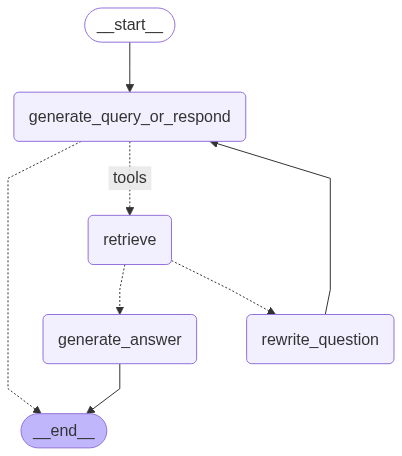

In [38]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "what do i need to keep in mind while advertising my institute?",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node", node)
        update["messages"][-1].pretty_print()
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_policies (call_k0nj)
 Call ID: call_k0nj
  Args:
    query: NACCAS guidelines for advertising institutes



Update from node retrieve
================================= Tool Message =================================
Name: retrieve_policies

Policy III.02 - Administrative Services:  
Policy on Advertising 
The National Accrediting Commission of Career Arts & Sciences, 
recognizing the desire of 
schools to make known their special offerings and resources, 
encourages schools to hold to a 
high standard of truthfulness in advertising and requires schools, at 
a minimum, to meet the 
standards set out in this policy on advertising. Advertising for the 
institution must be factual. 
All institutions are required to be in compliance with applicable 
local, state, and federal 
oversight agencies with respect to advertising the institution, 
attract